<a href="https://colab.research.google.com/github/ngozanlouisano/atom-script/blob/master/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Importation des bibliothèques requises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

# 2- Préparez vos données pour l'Analyse _ Modélisation

In [2]:
# Lire les données
df = pd.read_csv('/content/sample_data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
# vérification des valeurs nulles
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# nettoyer les valeurs nulles
def clean_data(df):
    df.fillna(0 , inplace = True)
    print(df.isnull().sum())

clean_data(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# affiche les valeurs uniques de chaque colonne dans un DataFrame
list_1 =[ 'adults', 'children', 'babies' ]
for i in list_1 :
    print('{} has unique values as {}'.format(i, df[i].unique()))

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


In [8]:
# ce code sélectionne les lignes du DataFrame df où les colonnes "adults", "children" et "babies" ont toutes une valeur de zéro, puis affiche les premières lignes du résultat filtré.
filter  = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)
df[filter].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05


In [9]:
pd.set_option('display.max_columns', None) #Pour afficher toutes les colonnes du jeu de données


In [10]:
df[filter].shape

(180, 32)

In [11]:
data = df[~filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 3- Analyser le pays d'origine des invités

## Voyons maintenant d'où vient l'invité.


In [12]:
# ce code compte le nombre d'occurrences de chaque pays dans le DataFrame data uniquement pour les réservations non annulées
country_wise_data = data[data['is_canceled'] == 0 ].country.value_counts().reset_index()
country_wise_data.columns = ['country' , 'no_of_guests']

In [13]:
country_wise_data.head()

,country,no_of_guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [14]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!pip install folium 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
# Importer les package folium et plotly
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [17]:
#folium.Map(location = [19.459810523021492, 72.81540862380825], zoom_start=13) 

In [18]:
guests_map = px.choropleth(country_wise_data,
                           locations = country_wise_data['country'],
                           color = country_wise_data["no_of_guests"],
                           hover_name = country_wise_data['country'],
                           title = "Home Country of Guests"
                          )
guests_map.show()

## Voyons combien les clients paient par nuit

In [19]:
#première permet de séparer les données non calculées
data2 = data[data['is_canceled'] == 0]

In [20]:
# les valeurs uniques de la colonne "hotel" dans le DataFrame data2
data2.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [21]:
fig = px.box(data2, 
             x="reserved_room_type", 
             y="adr" , 
             title = "Price of Room Type Per Night Per Person" ,
             color = 'hotel' ,
            labels = {'adr' : 'Price in Euros', 'reserved_room_type' : 'Room Type'})
fig.show() 

# 4. Analyser les prix des hôtels tout au long de l'année

## Voyons maintenant comment le prix par nuit varie au fil des ans

In [22]:
resort_hotel = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0) ]
city_hotel = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0) ]

In [23]:
resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
resort_hotel_mean = resort_hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel_mean = city_hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [25]:
print(resort_hotel_mean)
city_hotel_mean

   arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860


,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [26]:
# opération de fusion (merge) entre deux DataFrames resort_hotel et city_hotel 
# -----en utilisant la colonne "arrival_date_month" comme clé de fusion.
final = resort_hotel_mean.merge(city_hotel_mean , on = 'arrival_date_month')

# Renommer les differente colonnes
final.columns = ['month' , 'mean_price_of_resort_hotels', 'mean_price_of_city_hotels']

In [27]:
final  # Mais les données ne sont pas triées par mois

,month,mean_price_of_resort_hotels,mean_price_of_city_hotels
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [28]:
!pip install sorted.months.weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted.months.weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=17b35f7830e92d499bc0e2b86f2f8ebbf89cd9009c1fef5532030e6d218f0242
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted.months.weekdays


In [29]:
!pip install sort.dataframeby.monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort.dataframeby.monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=edc1b6c0118daa31961d8b585afd54c7c5858c36f5ed773e41e3e26c071920ba
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort.dataframeby.monthorweek


In [30]:
# Importer le package sort_dataframeby_monthorweek
import sort_dataframeby_monthorweek as sd

In [31]:
def sort_month(df , col_name):   #fonction pour trier les mois de la colonne
    return sd.Sort_Dataframeby_Month(df , col_name)

In [32]:
final = sort_month(final, 'month')
final


,month,mean_price_of_resort_hotels,mean_price_of_city_hotels
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [33]:
fig = px.line(final , 
        x = 'month' , 
        y =['mean_price_of_resort_hotels', 'mean_price_of_city_hotels'] , 
        title = "Room Price Per Night over the months" ,   
        labels = {"value"  : "Mean Price Per Night"
                 }
   )

fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.show()

# 5. Analyser la demande des hôtels


## quel est le mois le plus occupé et quel mois a le plus d'invités


In [34]:
resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [35]:
resort_busy_months = resort_hotel['arrival_date_month'].value_counts().reset_index()
resort_busy_months.columns = ['month' , 'no_of_guests']
resort_busy_months

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [36]:
city_busy_months = city_hotel['arrival_date_month'].value_counts().reset_index()
city_busy_months = city_hotel['arrival_date_month'].value_counts().reset_index()
city_busy_months.columns = ['month' , 'no_of_guests']

In [37]:
busy_months = resort_busy_months.merge(city_busy_months , on = 'month')
busy_months.columns = ['month' , 'no_of_resort_guests' , 'no_of_city_guests']
busy_months

,month,no_of_resort_guests,no_of_city_guests
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [38]:
# permet d'utiliser la fonction créée précédemment pour trier les mois
busy_months = sort_month(busy_months , 'month')
busy_months

,month,no_of_resort_guests,no_of_city_guests
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [39]:
fig = px.line(busy_months , 
        x = 'month' , 
        y =['no_of_resort_guests', 'no_of_city_guests'] , 
        title = "Frequecy of Quests Over the Months" ,   
        labels = {"value"  : "No of Guests"
                 }
   )

fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.show()

# 6. Sélectionnez les fonctionnalités importantes à l'aide de l'apprentissage automatique


## Maintenant, sélectionnons les fonctionnalités importantes en utilisant la corrélation



In [40]:
data.corr()

<ipython-input-40-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


<ipython-input-41-ef3b20150710>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

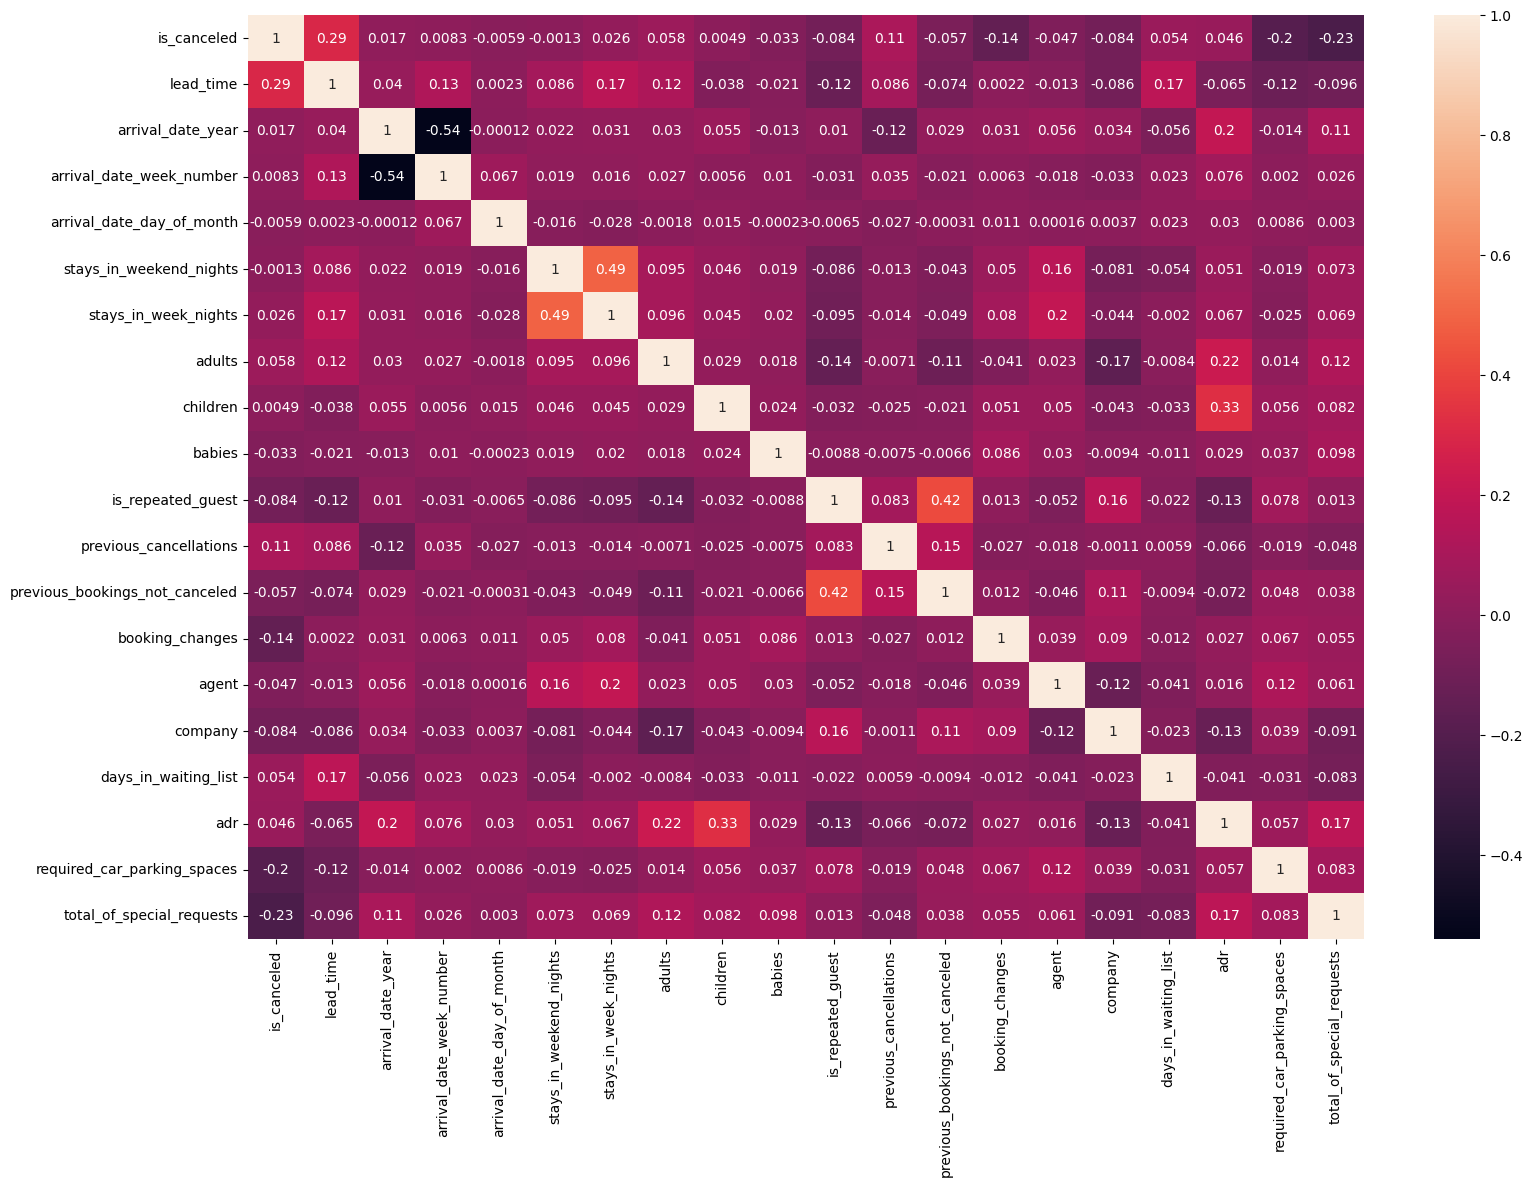

In [41]:
# ou nous vérifions également la corrélation à l'aide de la carte thermique
plt.figure(figsize = (18,12))
sns.heatmap(data.corr() , annot = True)

In [42]:
# Ce code calcule la corrélation entre la colonne "is_canceled" et toutes les autres colonnes du DataFrame data.
correlation = data.corr()['is_canceled']

<ipython-input-42-82f2dfb9c97c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [43]:
# identifier les variables qui ont la plus forte corrélation (positive ou négative) avec la colonne "is_canceled".
correlation.abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [44]:
# Ici, nous allons exclure daya_in_waitinf_list et arrival_date_yearlation en utilisant également la carte thermique
exclude_num_columns = ['days_in_waiting_list' , 'arrival_date_year'] 

In [45]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [46]:
# exclure les fonctionnalités catégorielles
num_features = [col for col in data.columns if data[col].dtypes != 'O' and col not in exclude_num_columns]  
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [47]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


## Permet de gérer les fonctionnalités catégorielles

In [48]:
exclude_cat_columns = ['arrival_date_year','assigned_room_type', 'booking_changes' 
                       ,'reservation_status' ,'country', 'days_in_waiting_list']

In [49]:
cat_features = [col for col in data.columns if data[col].dtypes == 'O' and col not in exclude_cat_columns]  
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

# 7. Comment extraire les fonctionnalités dérivées des données

In [50]:
cat_data = data[cat_features]
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [51]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [52]:
# ici permet d'extraire d'abord le mois et l'année de la colonne reservation_status_date 
# cat_data.reservation_status_date.unique()
cat_data['reservation_status_month'] = pd.to_datetime(cat_data['reservation_status_date'] , format = "%Y-%m-%d").dt.month
cat_data['reservation_status_year'] = pd.to_datetime(cat_data['reservation_status_date'] , format = "%Y-%m-%d").dt.year
cat_data['reservation_status_day'] = pd.to_datetime(cat_data['reservation_status_date'] , format = "%Y-%m-%d").dt.day
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,reservation_status_month,reservation_status_year,reservation_status_day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,7,2015,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,7,2015,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,7,2015,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,7,2015,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,7,2015,3


In [53]:
# ou nous pouvons également utiliser la fonction pour obtenir la date et le mois

"""
def get_month(date):
    return int(date.split('-')[1])
cat_data['month'] = cat_data['reservation_status_date'].map(get_month)
"""

"\ndef get_month(date):\n    return int(date.split('-')[1])\ncat_data['month'] = cat_data['reservation_status_date'].map(get_month)\n"

In [54]:
cat_data.drop(['reservation_status_date'] , axis = 1, inplace = True)

In [55]:
cat_data['cancellation'] = data['is_canceled']
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_month,reservation_status_year,reservation_status_day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7,2015,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7,2015,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7,2015,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7,2015,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7,2015,3,0


In [56]:
# ici, j'utiliserai l'encodage moyen pour convertir une caractéristique catégorique en numérique (de nombreuses autres techniques peuvent être utilisées)
encoding_cols = cat_data.columns[0:8]
encoding_cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [57]:
for col in encoding_cols:
    dict = cat_data.groupby([col])['cancellation'].mean()
    cat_data[col] = cat_data[col].map(dict)
    
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_month,reservation_status_year,reservation_status_day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,7,2015,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,7,2015,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,7,2015,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,7,2015,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,7,2015,3,0


In [58]:
# maintenant nous pouvons concaténer des colonnes numériques et catégorielles
dataframe = pd.concat([cat_data , data[num_features]] , axis = 1)

In [59]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_month,reservation_status_year,reservation_status_day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,7,2015,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,7,2015,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,7,2015,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,7,2015,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,7,2015,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [60]:
dataframe.drop(['cancellation'], axis =1 , inplace = True)

In [61]:
dataframe.head(10)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_month,reservation_status_year,reservation_status_day,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,7,2015,1,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,7,2015,1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,7,2015,2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,7,2015,2,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,7,2015,3,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1
5,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,7,2015,3,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1
6,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,7,2015,3,0,0,27,1,0,2,2,0.0,0,0,0,0,0,0.0,0.0,107.0,0,0
7,0.277674,0.374644,0.598997,0.153712,0.174868,0.330827,0.28402,0.407864,7,2015,3,0,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0.0,103.0,0,1
8,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,5,2015,6,1,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0.0,82.0,0,1
9,0.277674,0.374644,0.344653,0.343313,0.410598,0.318108,0.28402,0.407864,4,2015,22,1,75,27,1,0,3,2,0.0,0,0,0,0,0,15.0,0.0,105.5,0,0


In [62]:
print("mean: " , dataframe['lead_time'].median() , "median:" ,dataframe['lead_time'].mean())

print("we can see that mean is greater than median")

mean:  69.0 median: 104.10922741380756
we can see that mean is greater than median


<Axes: xlabel='lead_time', ylabel='Density'>

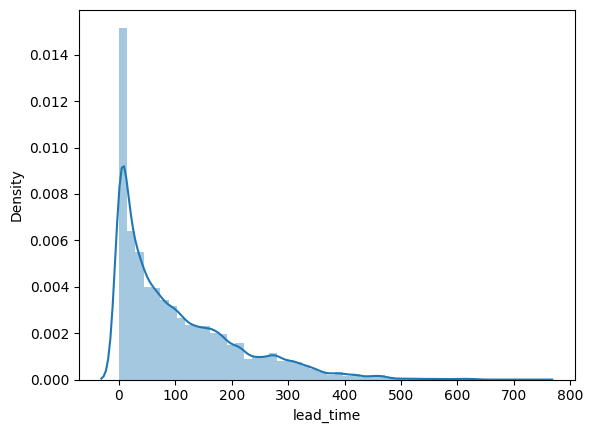

In [63]:
sns.distplot(dataframe['lead_time'])

In [64]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [65]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

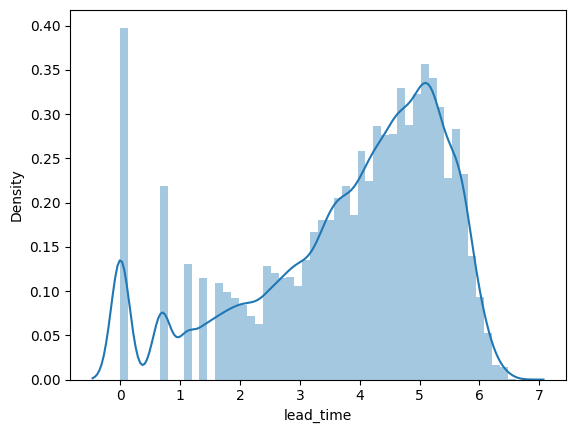

In [66]:
sns.distplot(dataframe['lead_time'])

<Axes: xlabel='adr', ylabel='Density'>

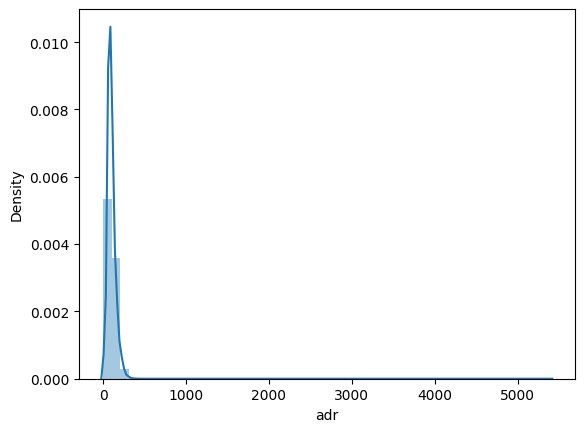

In [67]:
sns.distplot(dataframe['adr'])

In [68]:
handle_outlier('adr')

<Axes: xlabel='adr', ylabel='Density'>

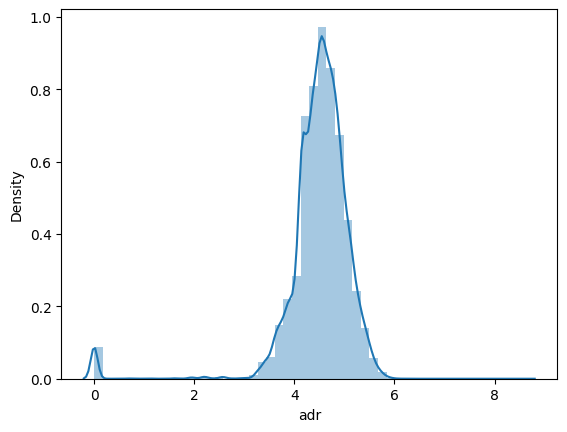

In [69]:
sns.distplot(dataframe['adr'])

In [70]:
## Importance des fonctionnalités



In [71]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
reservation_status_month          0
reservation_status_year           0
reservation_status_day            0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [72]:
dataframe.dropna(inplace = True)

In [73]:
# fonctionnalité dépendante et indépendante de la séparation

y = dataframe['is_canceled']
X = dataframe.drop(['is_canceled'] , axis = 1 )

In [74]:
print(X.shape)
print(y.shape)

(119209, 28)
(119209,)


### Sélection de fonctionnalité

In [75]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [76]:
feature_sel_model = SelectFromModel(Lasso(alpha =0.005 , random_state = 0))

In [77]:
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [78]:
feature_sel_model.get_support() 

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True])

In [79]:
total_columns_in_x = X.columns

In [80]:
selected_features = total_columns_in_x[feature_sel_model.get_support() ]
selected_features

Index(['deposit_type', 'reservation_status_month', 'reservation_status_year',
       'reservation_status_day', 'lead_time', 'arrival_date_week_number',
       'adults', 'children', 'previous_cancellations', 'booking_changes',
       'company', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [81]:
print("total features are : {}".format(len(total_columns_in_x)))
print("selected features are : {}".format(len(selected_features)))
print("i.e out of 28 features we have selected 14 feature for evaluation")

total features are : 28
selected features are : 14
i.e out of 28 features we have selected 14 feature for evaluation


## Ajustement du modèle à l'aide de la régression logistique

1. Diviser l'ensemble de données en ensemble d'entraînement et de test afin de prédire w.r.t X_test
2. Modèle d'importation
3. Ajustez les données
4. Prédire w.r.t X_test
5. Dans la régression, vérifiez le score
6. Graphique de tracé

Icône de validation par la communauté

In [82]:
print(dataframe.columns.to_list())
dataframe.shape

['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_month', 'reservation_status_year', 'reservation_status_day', 'is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


(119209, 29)

In [83]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25 , random_state = 0)

In [84]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = log_reg.predict(X_test)

In [86]:
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [88]:
confusion_matrix(y_test , y_pred)

array([[16627,  2012],
       [ 6283,  4881]])

In [89]:
log_reg.score(X_train , y_train)

0.7239670715611928

In [90]:
log_reg.score(X_test , y_test)

0.7216723148676307

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
score = cross_val_score(log_reg , X ,y , cv = 10)

In [93]:
score

array([0.63383944, 0.70338059, 0.73802533, 0.58493415, 0.74440064,
       0.67527892, 0.65783072, 0.70203842, 0.66001174, 0.65142617])

In [94]:
score.mean()

0.6751166129198432

### Permet d'appliquer plusieurs algorithmes et de vérifier la précision

In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [96]:
models = []
models.append(('Logistic Regression' ,LogisticRegression() ))
models.append(('Naive Bayes' ,GaussianNB() ))
models.append(('Random Forest Classifier' ,RandomForestClassifier() ))
models.append(('Decision Tree' ,DecisionTreeClassifier() ))

In [97]:
for name, model in models :
    print(name)
    model.fit(X_train , y_train)
    predictions = model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions , y_test))
    print("\n")
    print(accuracy_score(predictions , y_test) )
    print("\n")
          

Logistic Regression
[[16627  6283]
 [ 2012  4881]]


0.7216723148676307


Naive Bayes
[[ 7631  1174]
 [11008  9990]]


0.591249203100359


Random Forest Classifier
[[18526  1251]
 [  113  9913]]


0.9542327953561722


Decision Tree
[[17923   799]
 [  716 10365]]


0.9491661913230212


